## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [7]:
#load and look at data, grades from 0-10
pop = pd.read_csv('grades.csv')
pop.info()
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grade   100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


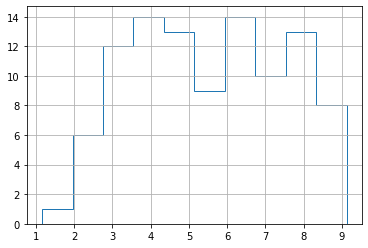

In [8]:
# create hist of pop, there is no recognizable simple form
pop.grade.hist(histtype='step')

In [9]:
# mean for sample is 5.5 in the sample, what is the true mean?
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [10]:
# use bootstraping to estimate the uncertainty of statistic (mean) 
# by increasing the sample and then characterizing
pop.sample(100,replace=True).describe() # mean is a bit different.

,grade
count,100.000000
mean,5.297972
std,2.173041
min,1.160899
25%,3.533538
50%,5.115175
75%,7.477510
max,9.120705


In [11]:
# generate bootstap sample, repeat, and fold into df bootstrap
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

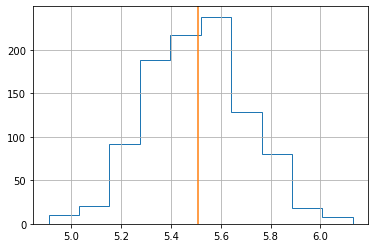

In [13]:
# create hist of means of grades derived from sampling
bootstrap.meangrade.hist(histtype='step')
# plot original mean with hist
pp.axvline(pop.grade.mean(),color='C1')
# mean is ~same, but there is significant spread around it.

In [14]:
# extract quanitels of sample means
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)
# 95% conf int is between 5.1 and 5.9

(5.136195279598067, 5.887672331198653)

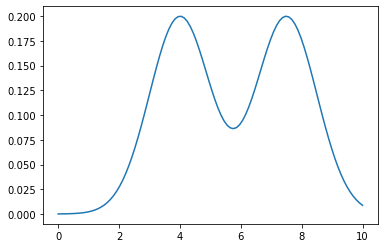

In [15]:
# prove guess is acceptable by looking at generation of grades dataset 
# which is sum of two norm dists truncated between 0 and 10
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x)) 

In [16]:
# get a random sample from the created dist.
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [17]:
draw() # sample of draw

3.511335779224007

In [18]:
# populate dataset by repeatedly calling draw()
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

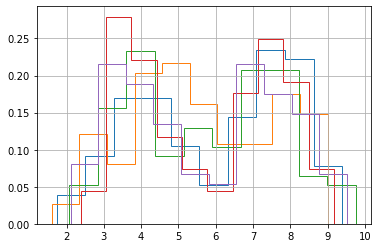

In [19]:
# hist of a few of the samplings of draw()
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [20]:
# simulate to get means
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

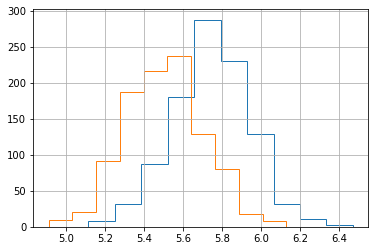

In [21]:
# histogram of means, compared with bootstrap dist.
# the distributions are offset from one another but the spreads are comprable
# justifies approximated confidence interval
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')